In [1]:
from data import Data
from signals import Signals
import backtest as bt
import pandas as pd
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

In [2]:
class Central(Data, Signals):
    
    def __init__(self, login=5528104, senha='YUWNehok', servidor='ActivTradesCorp-Server', balance=1000):
        super().__init__(login, senha, servidor)
        self.balance = balance
        
    
    def back_tpsl(self, tpsl):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy =  bt.otimizado_tpsl(self.return_full(), tpsl, balance=self.balance)
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        return tot, sell, buy
    
    
    def back_no_tpsl(self):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy = bt.otimizado_no_tpsl(self.return_full(), balance=self.balance)
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        return tot, sell, buy
    
    
    def back_tpsl_ohl(self, tpsl):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy = bt.otimizado_tpsl_ohl(self.return_full(), tpsl, balance=self.balance)
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        return tot, sell, buy

In [3]:
robot = Central()

In [4]:
robot.get_data_csv('DataH163k.csv',drop=True,drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [5]:
robot.return_data()

,EURCHF_Open,EURCHF_Close,EURCHF_High,EURCHF_Low,EURGBP_Open,EURGBP_Close,EURGBP_High,EURGBP_Low,EURJPY_Open,EURJPY_Close,...,AUDNZD_High,AUDNZD_Low,NZDCAD_Open,NZDCAD_Close,NZDCAD_High,NZDCAD_Low,AUDCAD_Open,AUDCAD_Close,AUDCAD_High,AUDCAD_Low
0,1.08185,1.08186,1.08190,1.08184,0.88258,0.88262,0.88263,0.88256,126.732,126.733,...,1.06667,1.06661,0.91951,0.91958,0.91965,0.91951,0.98110,0.98118,0.98118,0.98106
1,1.08186,1.08192,1.08192,1.08186,0.88262,0.88257,0.88262,0.88256,126.733,126.734,...,1.06673,1.06661,0.91956,0.91955,0.91960,0.91951,0.98118,0.98130,0.98130,0.98115
2,1.08192,1.08193,1.08194,1.08192,0.88257,0.88257,0.88260,0.88256,126.733,126.737,...,1.06673,1.06657,0.91955,0.91949,0.91960,0.91949,0.98130,0.98135,0.98136,0.98120
3,1.08192,1.08185,1.08192,1.08185,0.88257,0.88257,0.88261,0.88256,126.737,126.737,...,1.06663,1.06653,0.91949,0.91953,0.91954,0.91942,0.98136,0.98139,0.98143,0.98130
4,1.08186,1.08186,1.08187,1.08185,0.88256,0.88258,0.88261,0.88256,126.737,126.732,...,1.06667,1.06656,0.91953,0.91952,0.91957,0.91946,0.98139,0.98140,0.98146,0.98136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,1.10783,1.10794,1.10794,1.10783,0.85047,0.85045,0.85048,0.85004,130.062,130.062,...,1.08232,1.08232,0.88322,0.88313,0.88322,0.88313,0.95630,0.95632,0.95660,0.95620
62996,1.10794,1.10794,1.10794,1.10794,0.85045,0.85041,0.85045,0.85041,130.062,130.063,...,1.08237,1.08226,0.88313,0.88312,0.88313,0.88312,0.95644,0.95634,0.95644,0.95626
62997,1.10794,1.10794,1.10794,1.10794,0.85041,0.85037,0.85041,0.85037,130.066,130.076,...,1.08242,1.08196,0.88310,0.88273,0.88312,0.88273,0.95660,0.95657,0.95660,0.95655
62998,1.10794,1.10794,1.10794,1.10794,0.85037,0.85055,0.85075,0.85033,130.078,130.103,...,1.08222,1.08200,0.88283,0.88302,0.88302,0.88267,0.95656,0.95628,0.95656,0.95623


In [6]:
robot.pct_data()

In [7]:
robot.pct_data_signals_quantile(0.45, 0.55)

In [8]:
robot.return_data().iloc[:,-56:].sum()

EURCHF_sell    13380
EURCHF_buy     13391
EURGBP_sell    13828
EURGBP_buy     13918
EURJPY_sell    13457
EURJPY_buy     13396
EURNZD_sell    14348
EURNZD_buy     14357
EURUSD_sell    13825
EURUSD_buy     13763
EURAUD_sell    14366
EURAUD_buy     14399
EURCAD_sell    13957
EURCAD_buy     13962
GBPAUD_sell    14053
GBPAUD_buy     14034
GBPCHF_sell    13991
GBPCHF_buy     14033
GBPJPY_sell    14064
GBPJPY_buy     14089
GBPCAD_sell    14044
GBPCAD_buy     14014
GBPUSD_sell    14311
GBPUSD_buy     14286
GBPNZD_sell    14393
GBPNZD_buy     14403
USDCHF_sell    13759
USDCHF_buy     13753
USDJPY_sell    13380
USDJPY_buy     13347
AUDUSD_sell    15103
AUDUSD_buy     15114
NZDUSD_sell    15020
NZDUSD_buy     14997
USDCAD_sell    13802
USDCAD_buy     13866
AUDJPY_sell    14812
AUDJPY_buy     14807
CADJPY_sell    14288
CADJPY_buy     14258
CHFJPY_sell    13774
CHFJPY_buy     13832
NZDJPY_sell    14801
NZDJPY_buy     14796
AUDCHF_sell    14695
AUDCHF_buy     14661
CADCHF_sell    14206
CADCHF_buy   

In [9]:
robot.full_data_array()

In [10]:
tot, sell, buy = robot.back_tpsl(30)

c:\users\johnk\appdata\local\programs\python\python39\lib\site-packages\numba\core\dispatcher.py:241: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


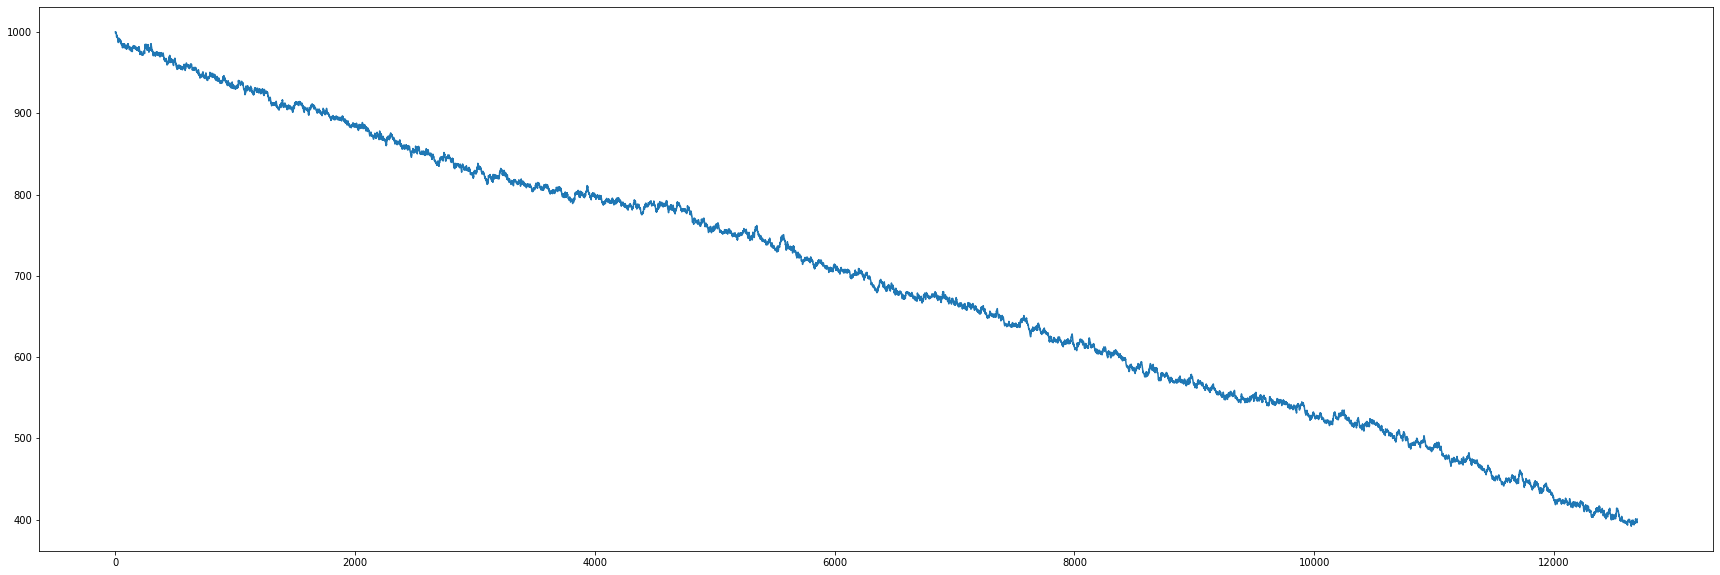

In [11]:
plt.plot(tot)

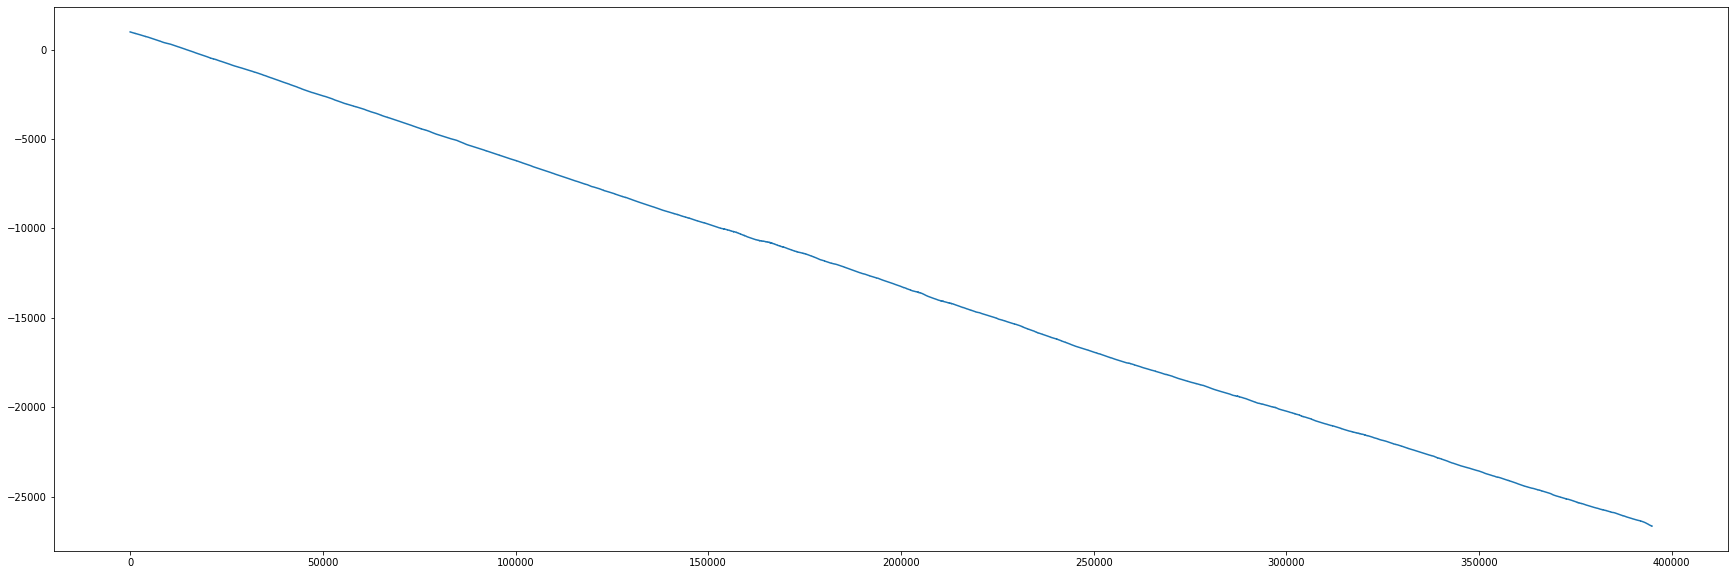

In [12]:
tot2, _, _ = robot.back_no_tpsl()
plt.plot(tot2)

In [13]:
tot2

array([  1000.        ,    999.83      ,    999.76      , ...,
       -26655.23999999, -26655.52999999, -26655.55999999])

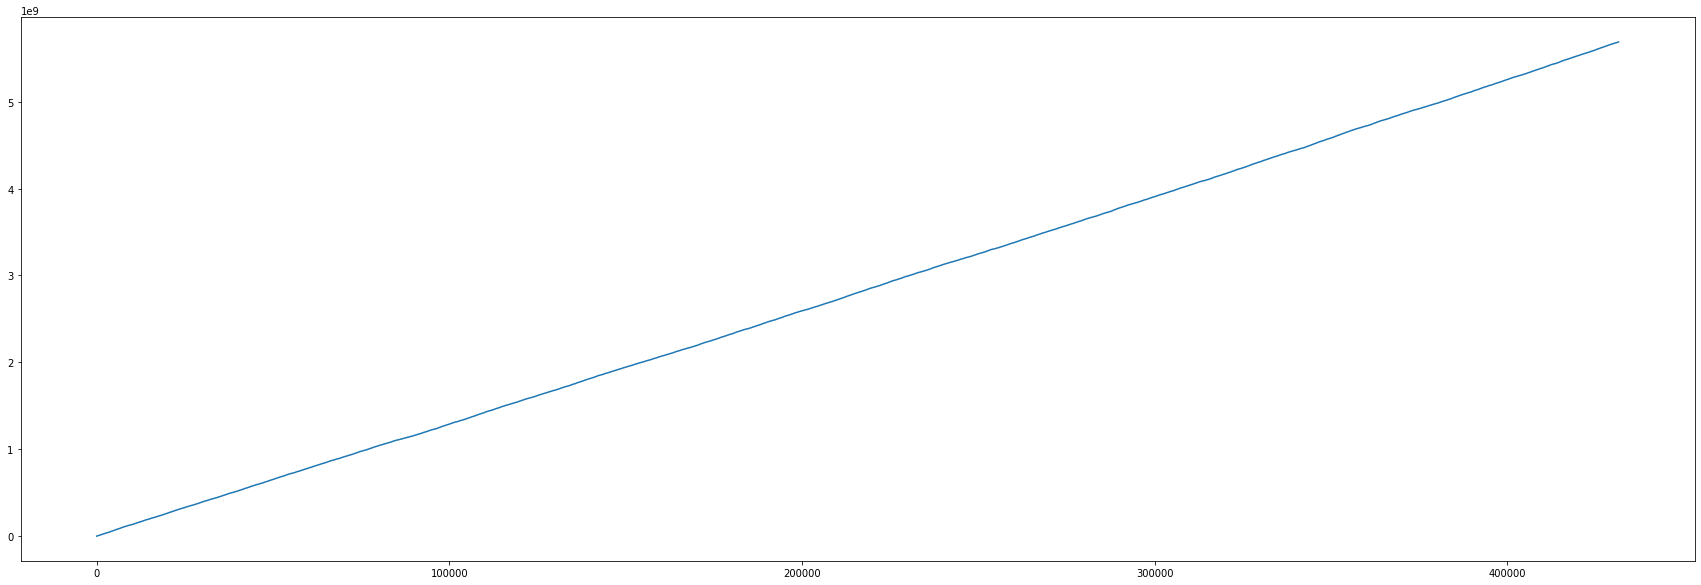

In [14]:
tot3, _, _ = robot.back_tpsl_ohl(50)
plt.plot(tot3)

- Rever a colocação dos backtestes por conta do lucro ridiculo
- Colocar o super backtest de 1.3kk
- Se sobrar tempo, pensar em passar os calculos para pandas